# Choosing a kernel

Different kernel functions induce different _priors_ over the space of all functions that a GPR model can represent. 

Choosing the correct kernel (and its hyper-parameters) is therefore a key part of fitting a GPR model to data!
For an excellent discourse on this subject, see [the kernel cookbook](https://www.cs.toronto.edu/~duvenaud/cookbook/).

Below, we show samples from functions drawn from a number of different kernels available in `mini-gpr`.

## RBF kernel

Perhaps the most commonly used kernel, the RBF kernel (or squared-exponential kernel) limits the functions that can be represented by a GPR model to those that are smooth, infinitely differentiable, and that have finite second moments:

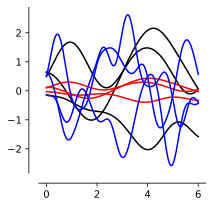

In [1]:
import matplotlib.pyplot as plt

from mini_gpr import kernels
from mini_gpr.viz import sample_kernel

sample_kernel(kernels.RBF(sigma=1, scale=1), c="black", n_samples=3)
sample_kernel(kernels.RBF(sigma=1, scale=0.2), c="red", n_samples=3)
sample_kernel(kernels.RBF(sigma=0.4, scale=1), c="blue", n_samples=3)

As you can see from above, the `scale` parameter controls the standard deviation (in the vertical direction) of the prior, while the `sigma` parameter controls the lengthscale (in the horizontal direction) of the prior.

## Linear kernel

The linear kernel, defined by the `m` and `scale` parameters limits the functions that can be represented by a GPR model to those that are linear and that:
- pass through `(m, 0)`
- pass through the `x=0` according to $y \sim \mathcal{N}(0, \text{scale}^2)$

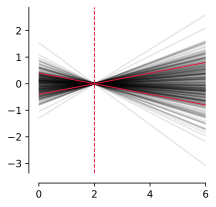

In [2]:
# feel free to change these values
scale = 0.2
m = 2

sample_kernel(
    kernels.Linear(m=m, scale=scale), n_samples=300, c="k", alpha=0.1, seed=42
)
plt.axvline(m, color="crimson", ls="--", lw=1)
plt.axline((m, 0), slope=scale, color="crimson", lw=1)
plt.axline((m, 0), slope=-scale, color="crimson", lw=1)
plt.xlim(0, 6);

## Periodic kernel

The periodic kernel limits the functions that can be represented by a GPR model to those that are perfectly periodic. The degree of oscillation within each period is controlled by the `sigma` parameter:

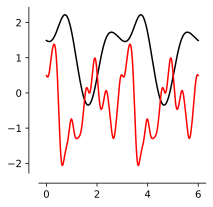

In [3]:
sample_kernel(kernels.Periodic(period=3, sigma=2, scale=3), c="black", n_samples=1)
sample_kernel(kernels.Periodic(period=3, sigma=0.3, scale=1), c="red", n_samples=1)

## Combined kernels

Priors with more structure can be constructed by combining multiple kernels.

One way to combine kernels is to add their output values together: in `mini-gpr`, this is done using the `+` operator:

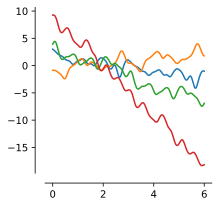

In [4]:
sample_kernel(
    kernels.Periodic(period=3, sigma=0.3) + kernels.Linear(m=2, scale=3)
)

Another way to combine kernels is to multiply their output values together: in `mini-gpr`, this is done using the `*` operator:

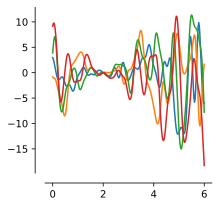

In [5]:
sample_kernel(
    kernels.Periodic(period=3, sigma=0.3) * kernels.Linear(m=2, scale=3)
)

The `**` exponentiation operator can be used to raise a kernel to a power:

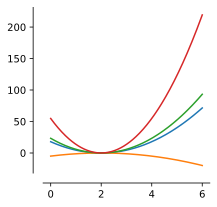

In [6]:
sample_kernel(kernels.Linear(m=2, scale=3) ** 2)

## Higher dimensions

Of course, in most practical applications, the input space is multi-dimensional.

All of the kernels defined in `mini-gpr` support multi-dimensional input spaces.

As an example, here are some samples from a 2D input space with an

### RBF kernel

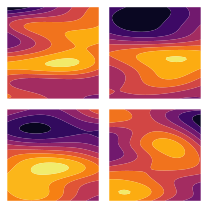

In [7]:
from mini_gpr.viz import sample_2d_kernel

sample_2d_kernel(kernels.RBF(sigma=[1, 0.3]))

### Combined DotProduct + RBF kernel

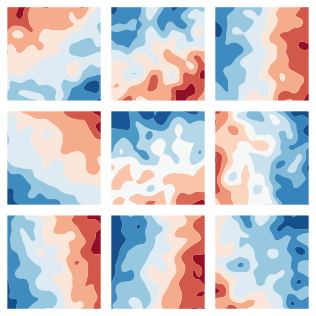

In [9]:
combined_kernel = kernels.DotProduct() + kernels.RBF(sigma=0.15, scale=0.2)
sample_2d_kernel(combined_kernel, cmap="RdBu", n=3**2)